## Mental Health Data Analysis(EDA)

In [1]:
# import numpy,pandas,matplotlib,seaborn library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#csv type file access by pandas
test_data=pd.read_csv("mental_health_finaldata_1.csv")
test_data

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
819,20-25,Male,Corporate,Go out Every day,No,Yes,No,Yes,Yes,Medium,No,Yes,Maybe
820,20-25,Male,Others,1-14 days,Yes,Yes,No,Yes,Maybe,Low,No,Maybe,Maybe
821,20-25,Male,Student,More than 2 months,Yes,Maybe,Maybe,No,Yes,High,Yes,Yes,Maybe
822,16-20,Male,Business,15-30 days,No,No,Maybe,No,Maybe,Low,Yes,No,Maybe


### 1. Demographic Distribution:

#### Q 1.1. What is the distribution of age groups in the dataset?

In [4]:
# distribution of age groups in the dataset
test_data["Age"].value_counts()

Age
30-Above    222
16-20       211
25-30       205
20-25       186
Name: count, dtype: int64

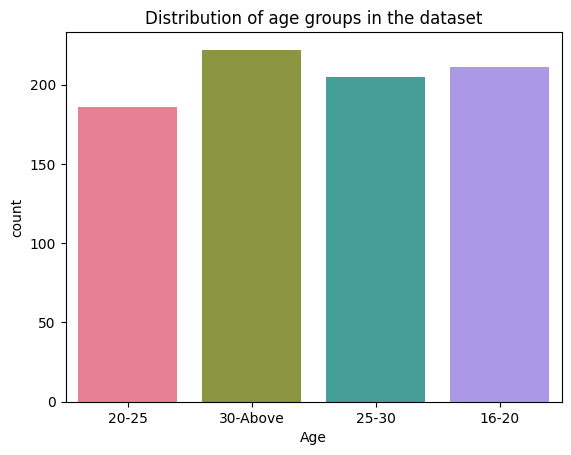

In [7]:
# countplot graph
sns.countplot(data=test_data,x="Age",palette="husl",hue="Age",legend=False)
plt.title("Distribution of age groups in the dataset")
plt.show()

**Observations**:

- We have **5 age groups** with in the data set => **16-20** , **20-25** , **25-30** , **30-Above** .
- From **count plot diagram** we conclude that **30-Above** has maximum number of **Quarantine People** .
- From **count plot diagram** we conclude that **20-25** has minimum number of **Quarantine People** .

#### Q 1.2. What is the gender distribution in the dataset?

In [8]:
# gender distribution in the dataset
test_data["Gender"].value_counts().reset_index()

,Gender,count
0,Female,434
1,Male,390


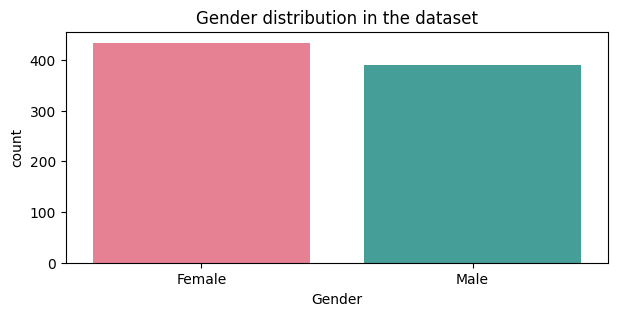

In [9]:
# countplot graph
plt.figure(figsize=(7,3))
sns.countplot(data=test_data,x="Gender",palette="husl",hue="Gender",legend=False)
plt.title("Gender distribution in the dataset")
plt.show()

**Observations**:

- We have **2 Gender Group** with in the data set => **Male** , **Female** .
- From **count plot diagram** we conclude that **Female** has maximum number of **Quarantine People** (**434**) .
- From **count plot diagram** we conclude that **Male** has minimum number of **Quarantine People** (**390**) .

#### Q 1.3. What are the most common occupations in the dataset?

In [14]:
# Count of different Occupations in the Data Set
test_data["Occupation"].value_counts().reset_index()

,Occupation,count
0,Housewife,185
1,Student,180
2,Corporate,159
3,Others,155
4,Business,145


In [12]:
# most commomn Occupation in the Data Set
occupation_count=test_data["Occupation"].mode().reset_index()
occupation_count

,index,Occupation
0,0,Housewife


**Observations**:

- We have **5 Occupation Groups** with in the data set => **Housewife** , **Student** , **Corporate** , **Others** , **Business** .
- From **DataFrame Analysis** we conclude that **Housewife** has maximum number of **Quarantine People** (**185**) .

### 2. Quarantine and Lifestyle Changes:

#### Q 2.1. How many days, on average, did people spend indoors?

In [16]:
# "Days_Indoors" different category value count of quarantine people
test_data["Days_Indoors"].value_counts().reset_index()

,Days_Indoors,count
0,31-60 days,171
1,1-14 days,170
2,Go out Every day,168
3,More than 2 months,160
4,15-30 days,155


In [18]:
# Adding a new column(Days_indoor_numeric) in the Data Set with a logic
def process_indoors_day(x):
    if x == "31-60 days":
        return 45
    elif x == "1-14 days":
        return 7
    elif x == "15-30 days":
        return 22
    elif x == "Go out Every day":
        return 0
    else:
        return 75
    
test_data["Days_indoor_numeric"] =  test_data["Days_Indoors"].apply(process_indoors_day) 
test_data.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,Days_indoor_numeric
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes,7
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes,45
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No,0
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes,7
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No,75


In [22]:
# Average days spend by the people indoors
test_data["Days_indoor_numeric"].mean().round()

29.0

**Observations**:

- We have **Days_Indoors** with in the data set => **Go out Every day** , **1-14 days** , **15-30 days** , **31-60 days** , **More than 2 months** .
- Create a logic=> **Go out Every day = 0 day** , **1-14 days = 7 days** , **15-30 days = 22 days** , **31-60 days = 45 days** , **More than 2 months = 75 days**
- From **DataFrame Analysis** we conclude that **Average days spend** by the people **indoors** is **29** .

#### Q 2.2. What percentage of respondents reported growing stress due to quarantine?

In [28]:
test_data["Growing_Stress"].value_counts().reset_index()

,Growing_Stress,count
0,Yes,301
1,Maybe,267
2,No,256


In [24]:
test_data.loc[test_data["Growing_Stress"]=="Yes"].shape # shape of "Growing_Stress"=="Yes" 

(301, 14)

In [25]:
test_data.shape # shape of total dataset

(824, 14)

In [39]:
# percentage of respondents reported growing stress due to quarantine
yes_count = test_data.loc[test_data["Growing_Stress"] == "Yes"].shape[0]
total = test_data.shape[0]
percentage = (yes_count / total) * 100
round(percentage, 2)

36.53

**Observations**:

- We have **3 Growing_Stress Groups** with in the data set => **Yes** , **Maybe** , **No** .
- Here we consider only **Growing_Stress = Yes** .
- From **DataFrame Analysis** we conclude that **percentage** of respondents reported **growing stress** due to **quarantine** is **36.53** .

In [30]:
# "Growing_Stress" count of different Category
growing_stress_count=test_data["Growing_Stress"].value_counts().reset_index() 
growing_stress_count

,Growing_Stress,count
0,Yes,301
1,Maybe,267
2,No,256


In [38]:
# percentage of respondents reported growing stress due to quarantine[With a logic]
growing_stress=(growing_stress_count.loc[0,"count"]*1)+(growing_stress_count.loc[1,"count"]*0.5)
total_count = test_data.shape[0]
growing_stress_percentage = ((growing_stress/total_count)*100).round(2)
growing_stress_percentage

52.73

**Observations**:

- We have **3 Growing_Stress Groups** with in the data set => **Yes** , **Maybe** , **No** .
- A logic implimentation => **Yes = 1** , **Maybe = 0.5** , **No = 0** .
- From **DataFrame Analysis** we conclude that **percentage** of respondents reported **growing stress** due to **quarantine** is **52.73** .

Observations:

We have 3 Growing_Stress Groups with in the data set => Yes , Maybe , No .
A logic implimentation => Yes = 1 , Maybe = 0.5 , No = 0 .
From DataFrame Analysis we conclude that percentage of respondents reported growing stress due to quarantine is 52.73 .